<a href="https://colab.research.google.com/github/ochamodev/data_science_at_work_project_final/blob/main/DS_Research_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [ ]:
# library imports

    # utils
import os
import shutil

    # data wrangling and graphs
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

    # dataset balancing
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

    # models, metrics and feature selection from sklearn

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error

    # tensorflow for DL
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

    # keras layers and models
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [ ]:
# GPU setup
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
else:
    print("No GPU found.")

GPU is available.


# Load dataset

In [ ]:
'''
Datasest found @
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
'''

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:03<00:00, 17.7MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
# copy to local dir
destination = "/content/dataset"
shutil.copytree(path, destination)

'/content/dataset'

In [ ]:
# read dataset
df = pd.read_csv("/content/dataset/creditcard.csv")

# EDA -- Exploratory Data Analysis

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# get nulls and NaNs
null_counts = df.isnull().sum()
nan_counts = df.isna().sum()

# display
null_nan_table = pd.DataFrame({
    'Column': df.columns,
    'Null Count': null_counts.values,
    'NaN Count': nan_counts.values
})

null_nan_table

,Column,Null Count,NaN Count
0,Time,0,0
1,V1,0,0
2,V2,0,0
3,V3,0,0
4,V4,0,0
5,V5,0,0
6,V6,0,0
7,V7,0,0
8,V8,0,0
9,V9,0,0


In [ ]:
# show rows with errors
error_rows = df[df.isnull().any(axis=1)]
error_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
df.Class.unique()

array([0, 1])

In [ ]:
# get the percentage each category represents from the overall labels
counts = df.Class.value_counts()
percentage = (counts / len(df)) * 100
percentage

,count
Class,
0,99.827251
1,0.172749


In [ ]:
counts

,count
Class,
0,284315
1,492


## Graficas

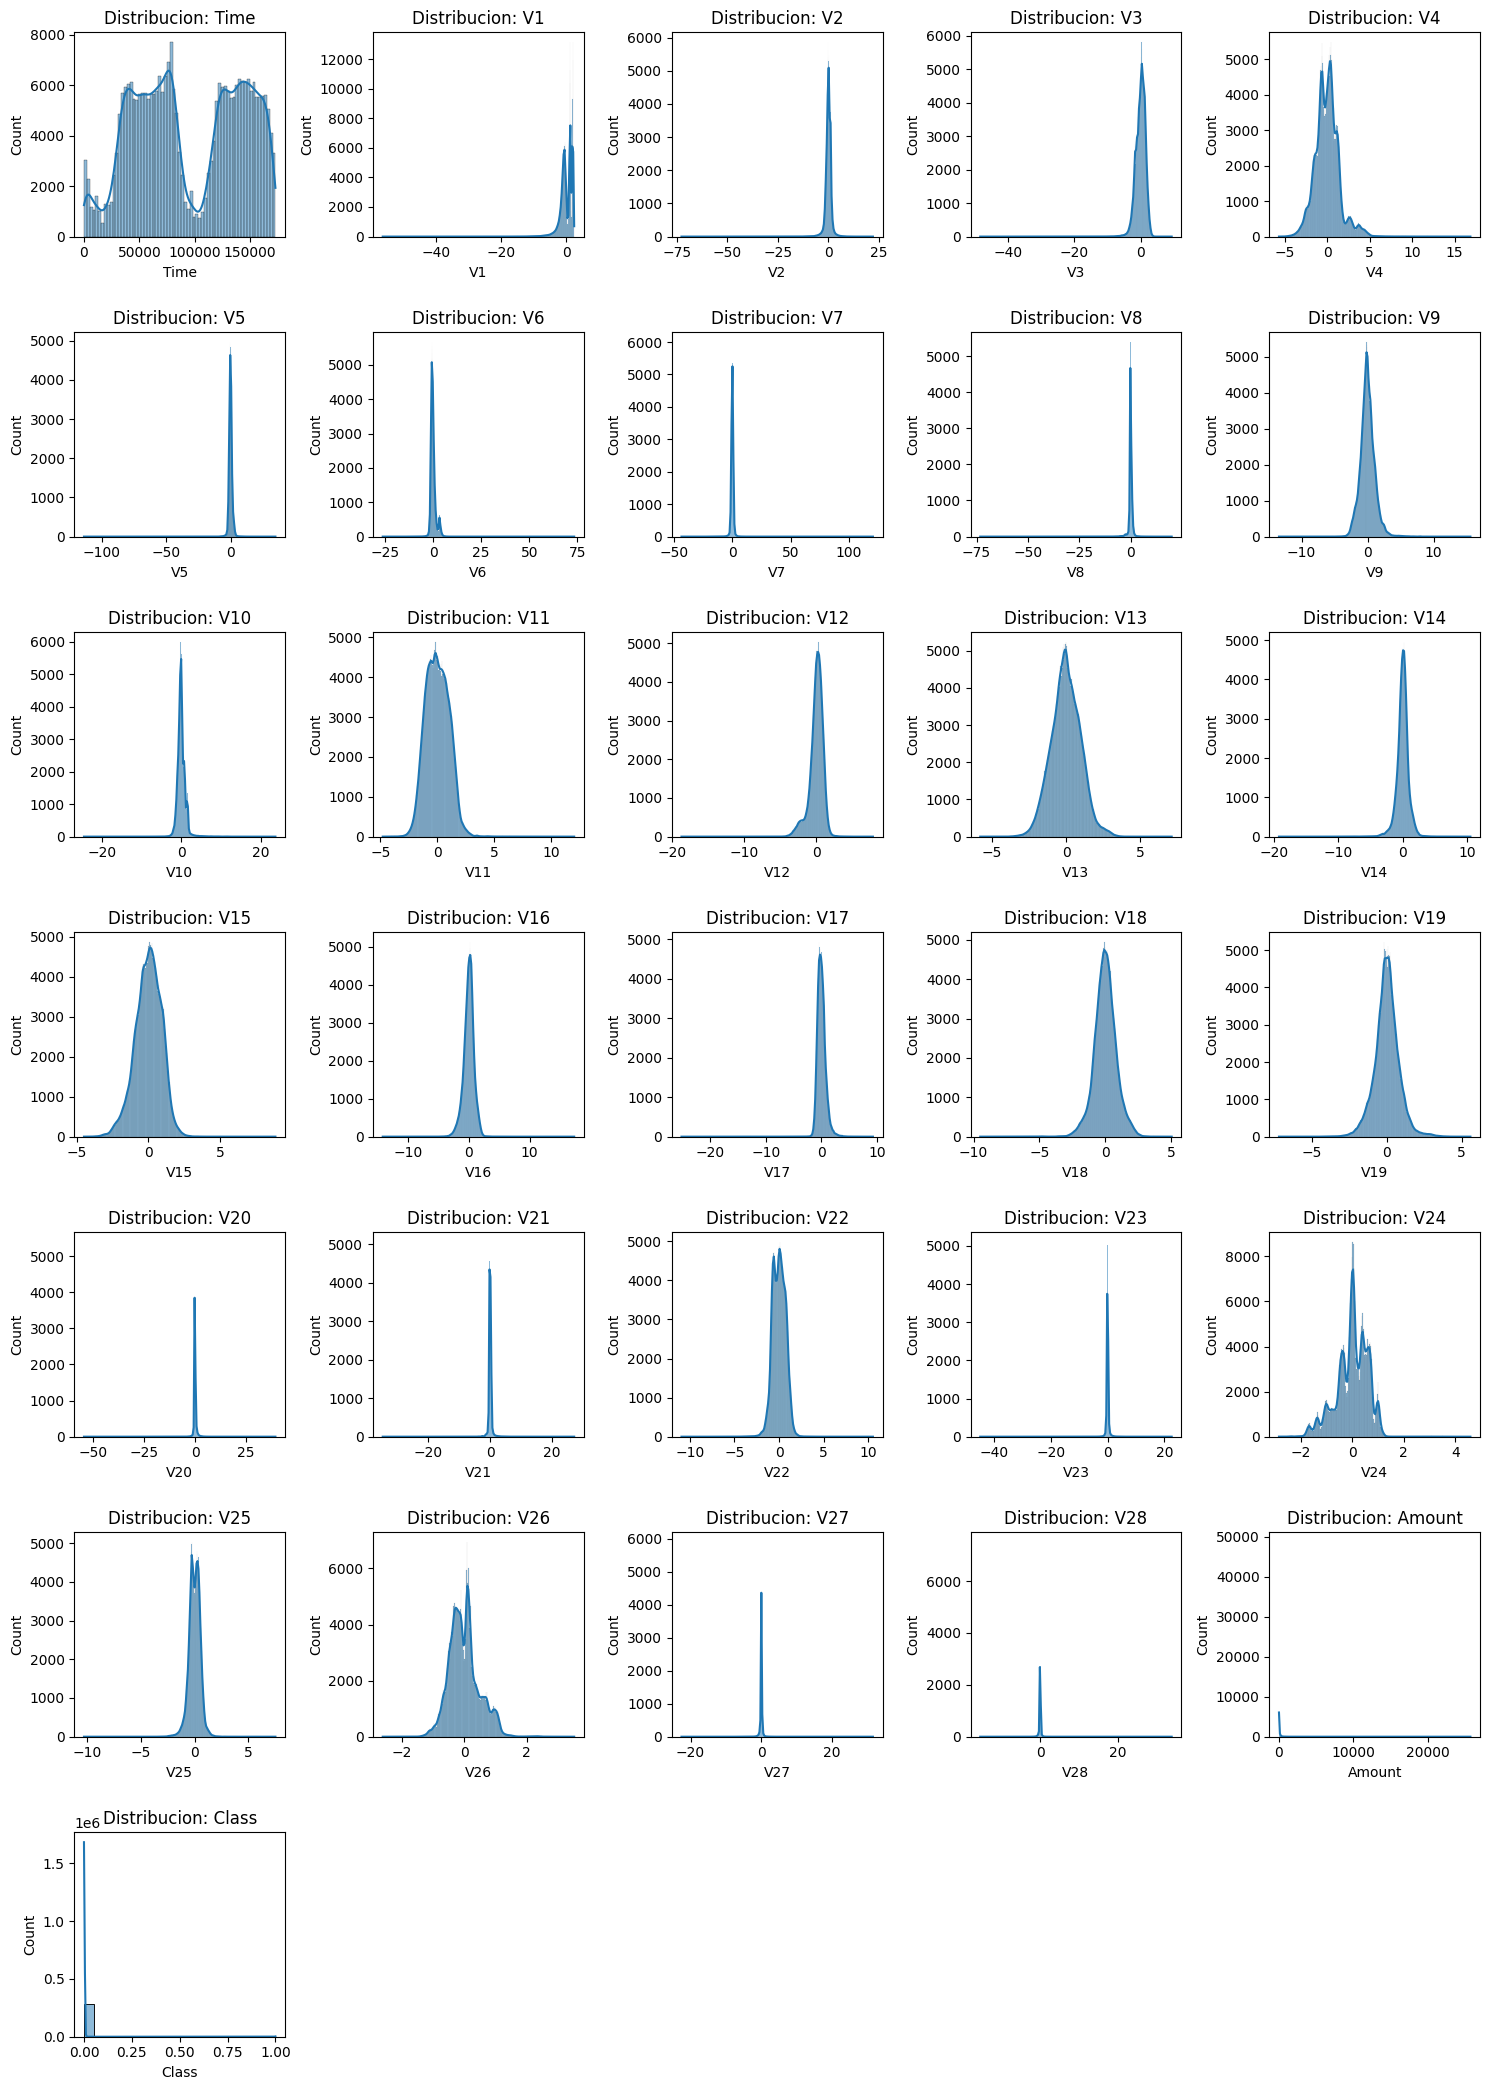

In [ ]:
# convert columns to list
columns_to_graph = df.columns.tolist()
num_columns = len(columns_to_graph)

cols = 5
rows = math.ceil(num_columns / cols)

# histograms for each column
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(columns_to_graph, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribucion: {col}')
plt.tight_layout()
plt.show()

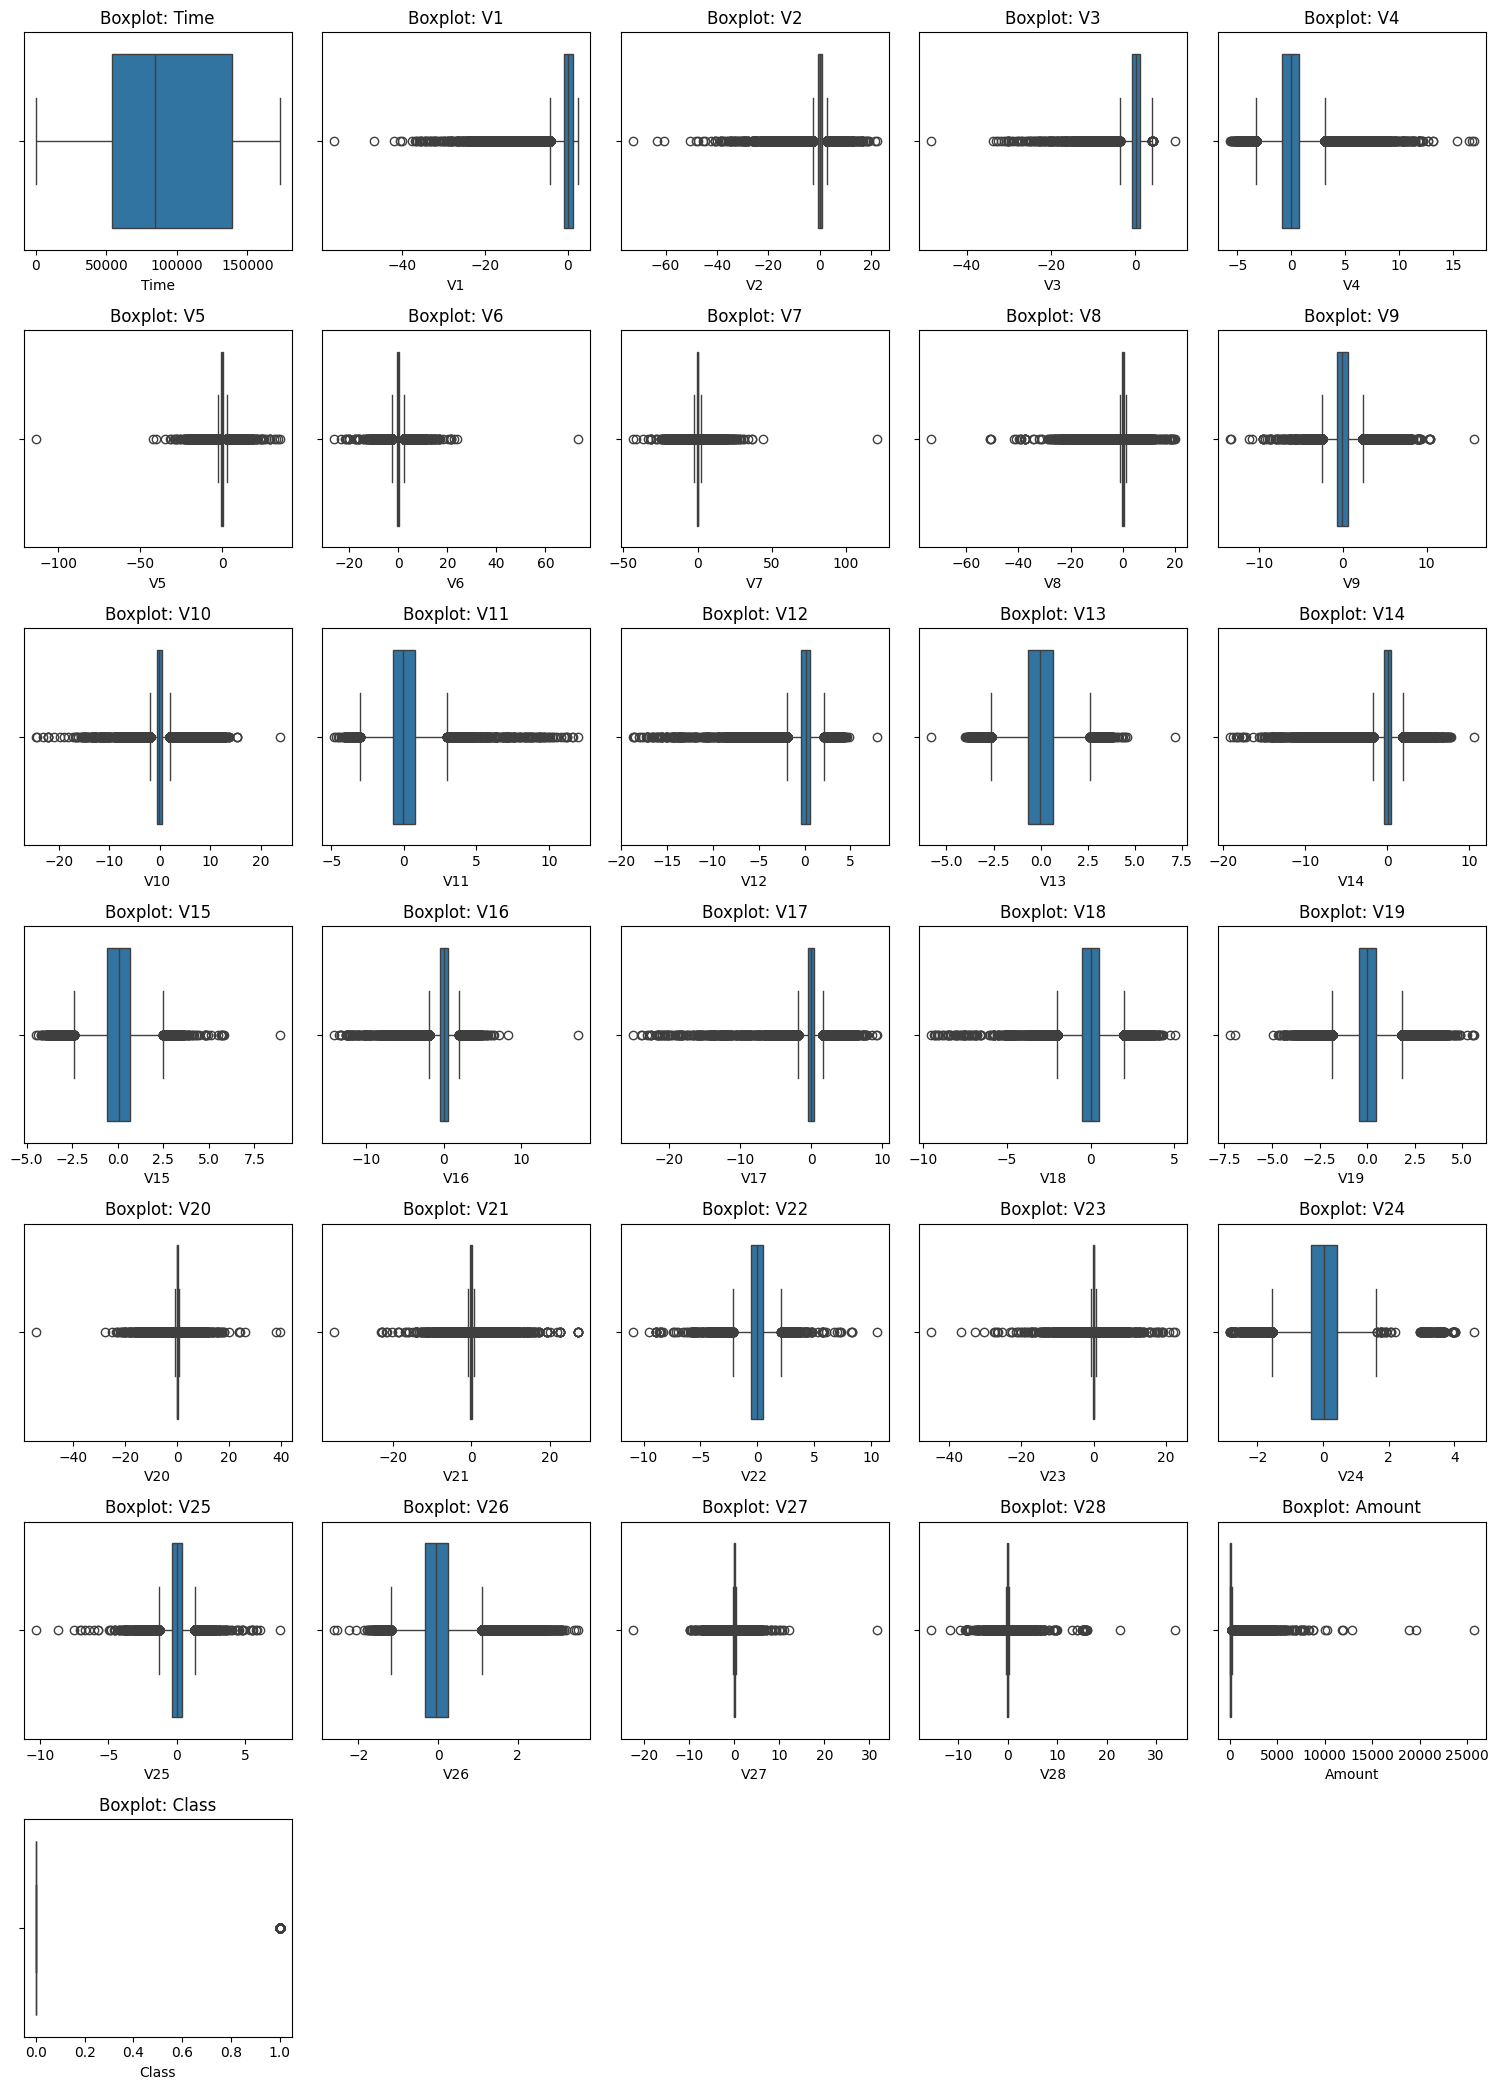

In [ ]:
# boxplots to detect outliers
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(columns_to_graph, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

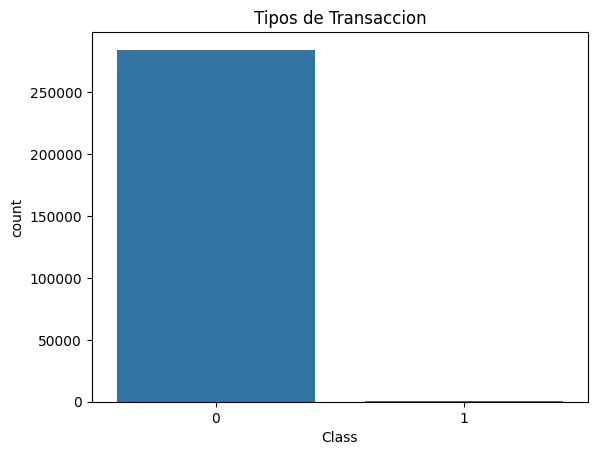

In [ ]:
# distribution for fraud/non fraud
sns.countplot(x='Class', data=df)
plt.title("Tipos de Transaccion")
plt.show()

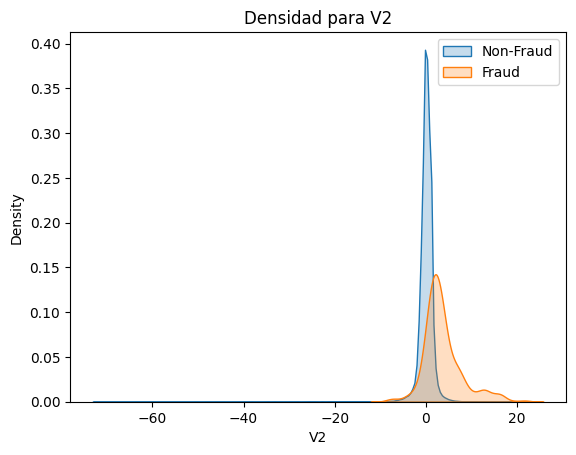

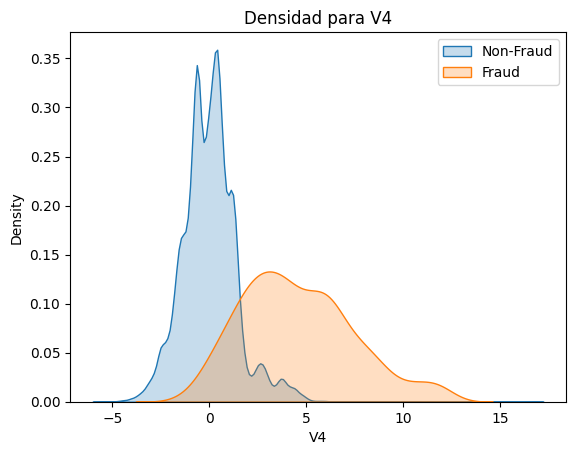

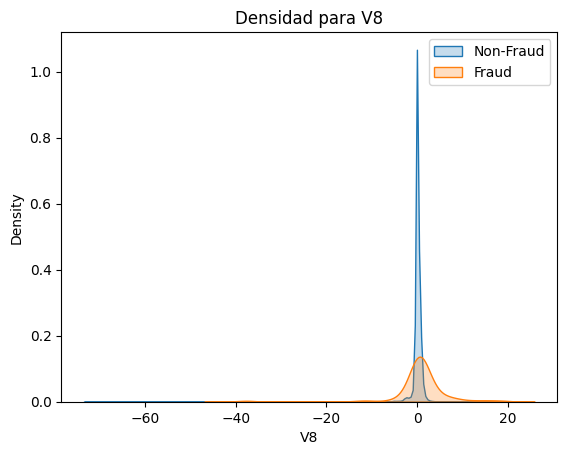

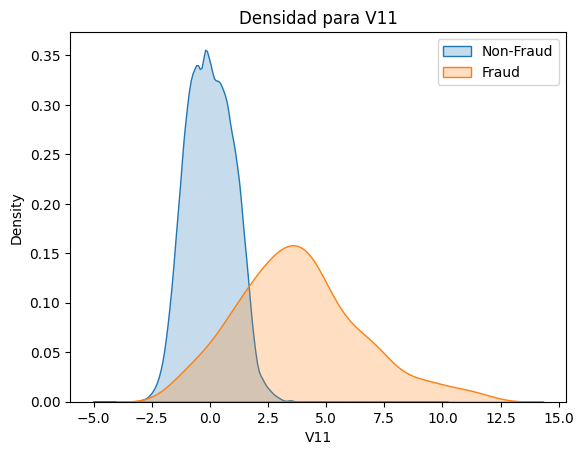

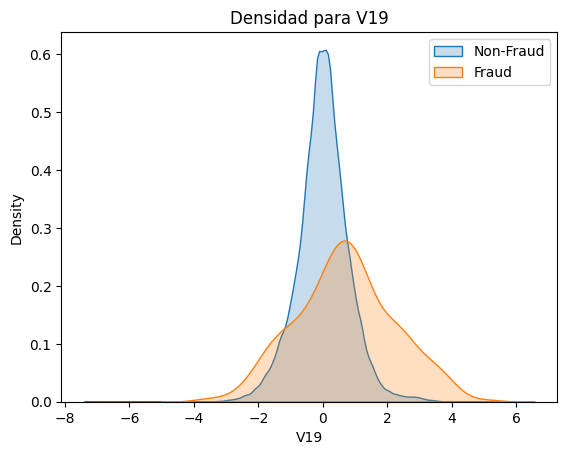

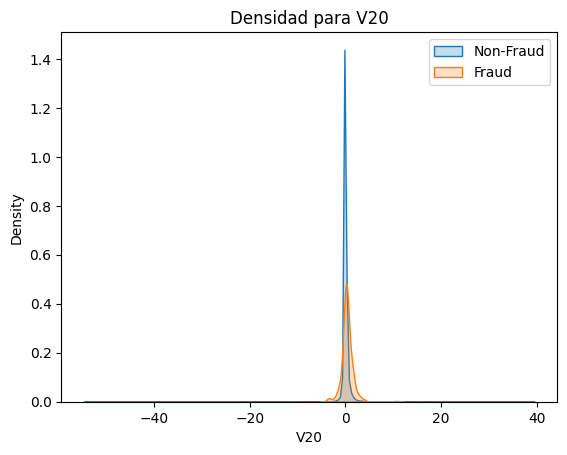

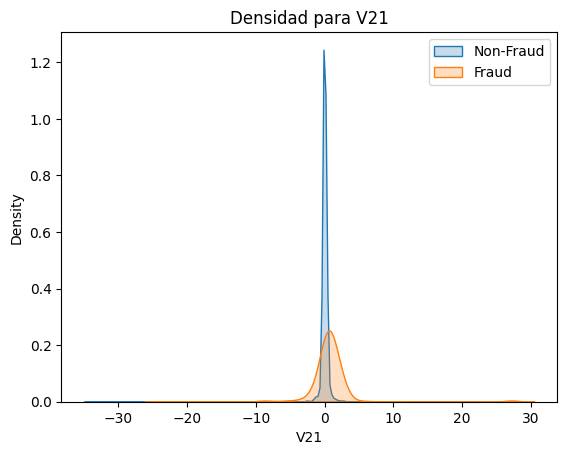

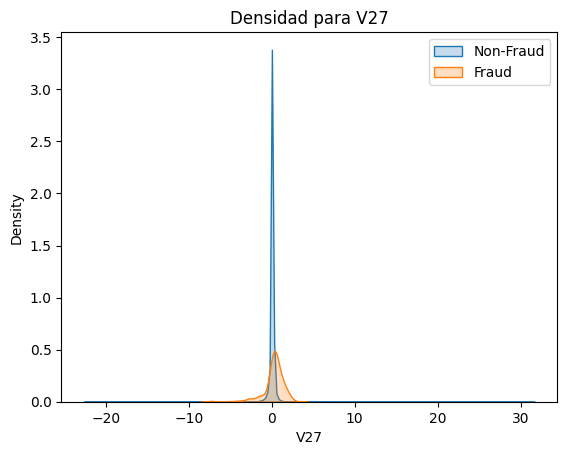

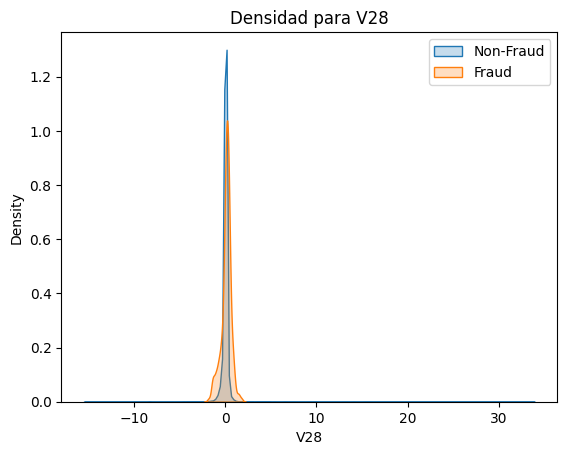

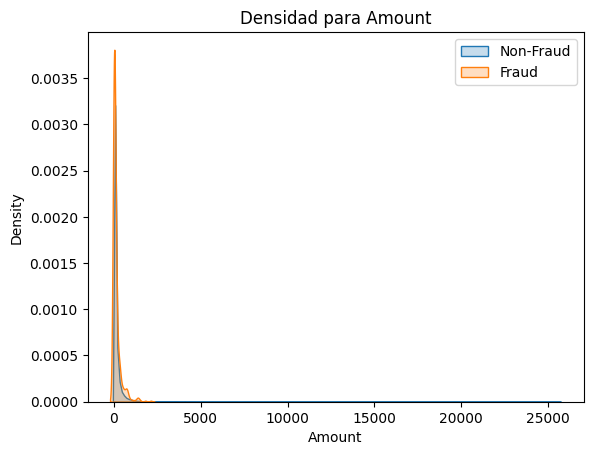

In [ ]:
# density plot
for feature in ['V2', 'V4', 'V8', 'V11', 'V19', 'V20', 'V21', 'V27', 'V28', 'Amount']:
    sns.kdeplot(df[feature][df['Class'] == 0], label='Non-Fraud', fill=True)
    sns.kdeplot(df[feature][df['Class'] == 1], label='Fraud', fill=True)
    plt.title(f'Densidad para {feature}')
    plt.legend()
    plt.show()

In [ ]:
df_no_nans = df.dropna().copy()

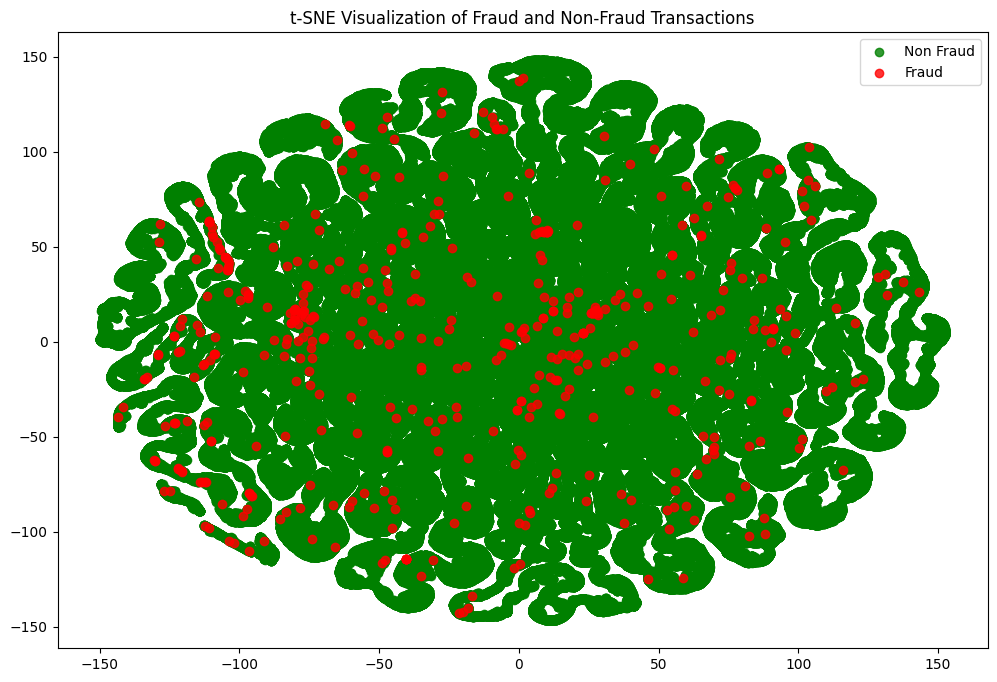

In [ ]:
# t-Distributed Stochastic Neighbor Embedding to reduce dataset dimensions and produce points with max information
def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.title("t-SNE Visualization of Fraud and Non-Fraud Transactions")
    plt.show()

# features (X) and target (Y)
X = df_no_nans.drop('Class', axis=1)
Y = df_no_nans['Class']

tsne_plot(X, Y)

## Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

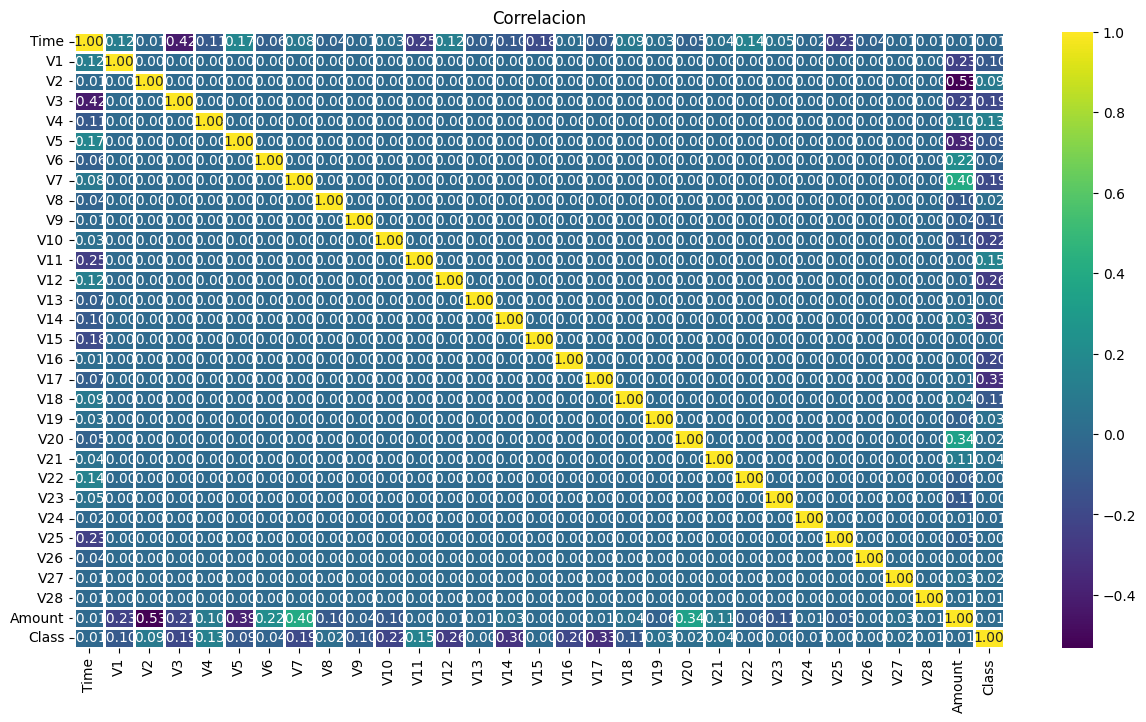

In [ ]:
# corr plot
corr_matrix = df_no_nans.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, linewidths=1, cmap='viridis', annot=True, fmt='.2f')
plt.title("Correlacion")
plt.show

In [ ]:
# display correlation with Class
correlation_with_class = df_no_nans.corr()['Class'].sort_values(ascending=False)
correlation_with_class

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


# Preprocessing

In [ ]:
# make a copy
df_clean = df.copy()

# drop Time column
df_clean = df_clean.drop(columns=['Time'])

# scaling
robust_scaler = RobustScaler()
df_clean['Amount'] = robust_scaler.fit_transform(df_clean[['Amount']])

# Min max scaling
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_minmax, columns=df_clean.columns)

In [ ]:
# dependent and independent variable split
X = df_clean.drop(columns=['Class'])
y = df_clean['Class']

# train test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Autoencoder Models

## Prueba 1

In [ ]:
# input layer
input_layer = Input(shape=(X.shape[1],))


In [ ]:
from keras.layers import Input,Dense
from keras.models import Model

# number of neurons in the encoding hidden layer
encoding_dim = 5
# input placeholder
input_data = Input(shape=(6,)) # 6 is the number of features/columns
# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation ='relu')(input_data)
# decoder is the lossy reconstruction of the input
decoded = Dense(6, activation ='sigmoid')(encoded) # 6 again number of features and should match input_data


# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)




# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# model optimizer and loss
autoencoder = Model(input_data, decoded)

# loss function and optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, = train_test_split(data, test_size=0.1, random_state=42)


# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)

autoencoder.summary()

# predict after training
# note that we take them from the *test* set
encoded_data = encoder.predict(x_test)

## Prueba 2

In [ ]:
# define autoencoder architecture
def build_autoencoder(input_dim):
  model = Sequential([
    Input(shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(input_dim, activation='sigmoid')
  ])
  model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
  return model

In [ ]:
# cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=37)

# store results for all models
results = {}

In [ ]:
# train and evaluate model
def train_evaluate_autoencoder(X_train, X_test, y_test, description):
  input_dim = X_train.shape[1]
  autoencoder = build_autoencoder(input_dim)
  autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test), verbose=1)

  # predictions and error
  reconstructions = autoencoder.predict(X_test)
  mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

  # threshold for anomaly detection
  threshold = np.percentile(mse, 95)
  y_pred = (mse > threshold).astype(int)

  # evaluation metrics
  report = classification_report(y_test, y_pred, output_dict=True)
  cm = confusion_matrix(y_test, y_pred)

  # store results
  results[description] = {
      'classification_report': report,
      'confusion_matrix': cm
  }

In [ ]:
# 1: Base
train_evaluate_autoencoder(X_train, X_test, y_test, 'Base Autoencoder')

###### 2: Oversampling

# 2.a: SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
train_evaluate_autoencoder(X_train_smote, X_test, y_test, 'Autoencoder + SMOTE')

# 2.b: Random Oversampling
ros = RandomOverSampler(random_state=37)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
train_evaluate_autoencoder(X_train_ros, X_test, y_test, 'Autoencoder + Random Oversampling')

###### 2: Undersampling
# 3.a: Near Miss
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)
train_evaluate_autoencoder(X_train_nm, X_test, y_test, 'Autoencoder + Near Miss')

# 3.b: Random Undersampling
rus = RandomUnderSampler(random_state=37)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
train_evaluate_autoencoder(X_train_rus, X_test, y_test, 'Autoencoder + Random Undersampling')

# 4: SMOTE + Random Undersampling
smote_enn = SMOTEENN(random_state=37)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)
train_evaluate_autoencoder(X_train_smote_enn, X_test, y_test, 'Autoencoder + SMOTE + Random Undersampling')

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.2914 - val_loss: 1.1716
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2479 - val_loss: 1.1528
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2087 - val_loss: 1.1575
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2347 - val_loss: 1.1457
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.1863 - val_loss: 1.1461
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.3043 - val_loss: 1.1510
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2041 - val_loss: 1.1398
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2854 - val_loss: 1.1472
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1.2160 - val_loss: 1.1546
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1.2397 - val_loss: 1.1575
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1

In [ ]:
# compare results
comparison_df = pd.DataFrame({
    model: {
        'Precision': results[model]['classification_report']['1']['precision'],
        'Recall': results[model]['classification_report']['1']['recall'],
        'F1-Score': results[model]['classification_report']['1']['f1-score']
    }
    for model in results.keys()
}).T

print(comparison_df)

                                            Precision    Recall  F1-Score
Base Autoencoder                             0.029484  0.857143  0.057007
Autoencoder + SMOTE                          0.028431  0.826531  0.054971
Autoencoder + Random Oversampling            0.028431  0.826531  0.054971
Autoencoder + Near Miss                      0.028080  0.816327  0.054293
Autoencoder + Random Undersampling           0.028431  0.826531  0.054971
Autoencoder + SMOTE + Random Undersampling   0.028431  0.826531  0.054971


In [ ]:
for model in results.keys():
  print(results[model]['classification_report'])

{'0': {'precision': 0.9997412821318352, 'recall': 0.9513752110298256, 'f1-score': 0.9749587752417167, 'support': 56864.0}, '1': {'precision': 0.029484029484029485, 'recall': 0.8571428571428571, 'f1-score': 0.057007125890736345, 'support': 98.0}, 'accuracy': 0.9512130894280397, 'macro avg': {'precision': 0.5146126558079324, 'recall': 0.9042590340863413, 'f1-score': 0.5159829505662266, 'support': 56962.0}, 'weighted avg': {'precision': 0.9980720076899355, 'recall': 0.9512130894280397, 'f1-score': 0.9733794897244175, 'support': 56962.0}}
{'0': {'precision': 0.9996858425886571, 'recall': 0.9513224535734384, 'f1-score': 0.9749047099849518, 'support': 56864.0}, '1': {'precision': 0.028431028431028432, 'recall': 0.826530612244898, 'f1-score': 0.05497115710892433, 'support': 98.0}, 'accuracy': 0.9511077560478916, 'macro avg': {'precision': 0.5140584355098428, 'recall': 0.8889265329091682, 'f1-score': 0.5149379335469381, 'support': 56962.0}, 'weighted avg': {'precision': 0.9980148518968371, 're

In [ ]:
for model in results.keys():
  print(results[model]['confusion_matrix'])

[[54099  2765]
 [   14    84]]
[[54096  2768]
 [   17    81]]
[[54096  2768]
 [   17    81]]
[[54095  2769]
 [   18    80]]
[[54096  2768]
 [   17    81]]
[[54096  2768]
 [   17    81]]


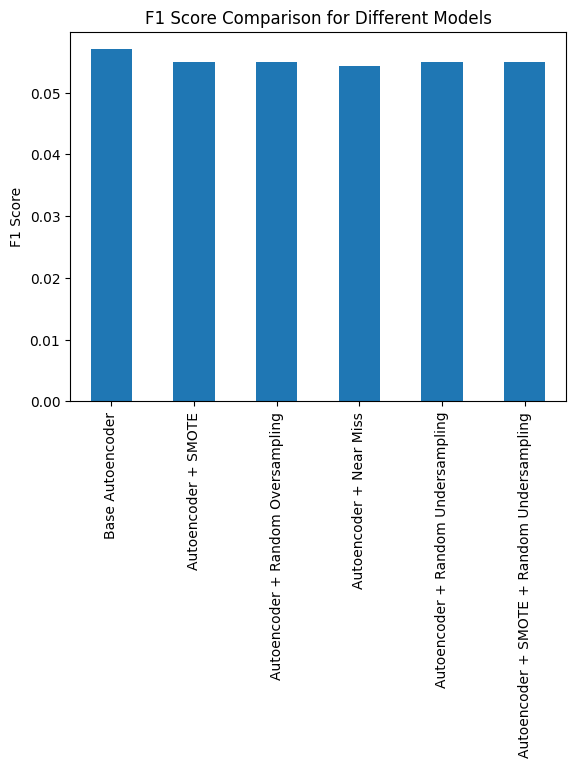

In [ ]:
# F1-Score Comparison
comparison_df['F1-Score'].plot(kind='bar', title='F1 Score Comparison for Different Models', ylabel='F1 Score')
plt.show()
